In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [7]:
len(X_train)

60000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

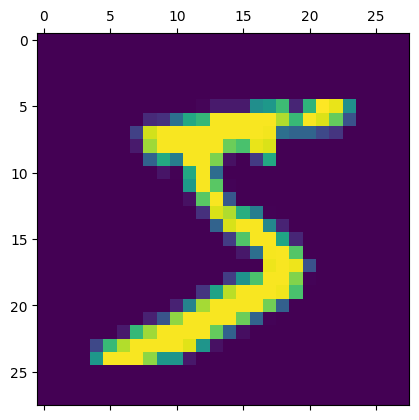

In [14]:
plt.matshow(X_train[0])

#here we scaled the dataset by dividing it by 255


In [9]:
X_train_Scaled=X_train/255
X_test_Scaled=X_test/255

In [10]:
X_train_Scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_Scaled.shape

(60000, 28, 28)

#here we are going to flatten the dataset in (x,784)


In [12]:

X_train_flatten=X_train_Scaled.reshape(len(X_train_Scaled),28*28)
X_test_flatten=X_test_Scaled.reshape(len(X_test_Scaled),28*28)

In [13]:
X_train_flatten.shape

(60000, 784)

In [16]:
model =keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1236 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0522 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0407 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9776


[0.08466459065675735, 0.9775999784469604]

In [19]:
y_pred=model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


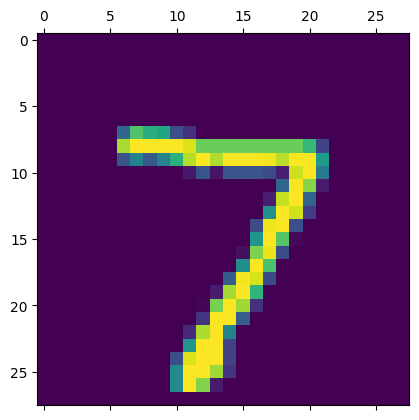

In [27]:
plt.matshow(X_test[0])

In [28]:
np.argmax(y_pred[0])

7

In [20]:
y_pred_val=[np.argmax(i) for i in y_pred]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_val)

In [22]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    0,    0,    0,    1,    5,    1,    3,    3],
       [   0, 1127,    4,    1,    0,    1,    1,    0,    1,    0],
       [   0,    6, 1005,    3,    0,    0,    4,    3,    9,    2],
       [   0,    0,    5,  990,    0,    1,    0,    2,    5,    7],
       [   2,    1,    2,    0,  954,    1,    6,    2,    4,   10],
       [   2,    1,    0,   13,    1,  856,    6,    2,    8,    3],
       [   2,    3,    1,    1,    2,    2,  942,    0,    5,    0],
       [   2,    7,    8,    3,    1,    0,    0,  996,    3,    8],
       [   3,    0,    4,    3,    2,    2,    1,    3,  951,    5],
       [   2,    3,    0,    3,    5,    2,    1,    1,    3,  989]])>

Text(50.722222222222214, 0.5, 'Truth')

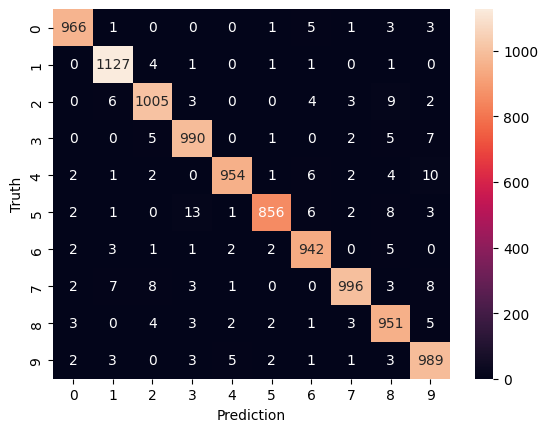

In [25]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

**Activation Functions in Neural Networks**

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Different activation functions are used depending on the problem type and network architecture.

In [29]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define range for plotting
x = np.linspace(-10, 10, 400).astype(np.float32)


1. Sigmoid (Logistic) Function

Formula:

               σ(x)=1/1+e^−x


Range: (0, 1)

Properties:

-Smooth and differentiable.

-Output interpreted as probability.

-Can cause vanishing gradient for large positive/negative inputs.

Use Cases:

-Binary classification (output layer).

-Probabilistic models.

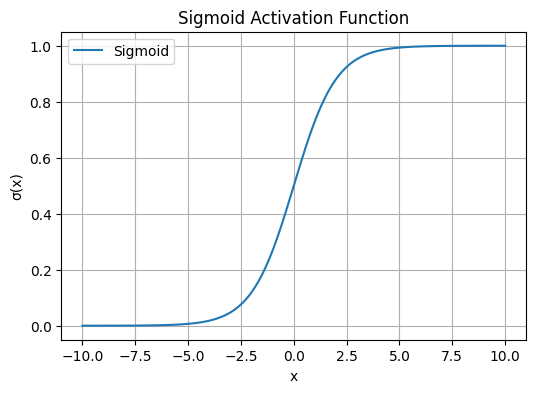

In [30]:
y = tf.sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()


In [36]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Sigmoid activation
output = tf.sigmoid(x)

# Print the result
print(output.numpy())


[0.62245935]


2. Hyperbolic Tangent (Tanh)

Formula:

tanh=    tanh(x)=(e^x+e^−x)/(e^x−e^−x​)


Range: (-1, 1)

Properties:

-Zero-centered, which helps optimization.

-Still suffers from vanishing gradient for large inputs.

Use Cases:

-Hidden layers in feedforward networks.

-Recurrent Neural Networks (RNNs).

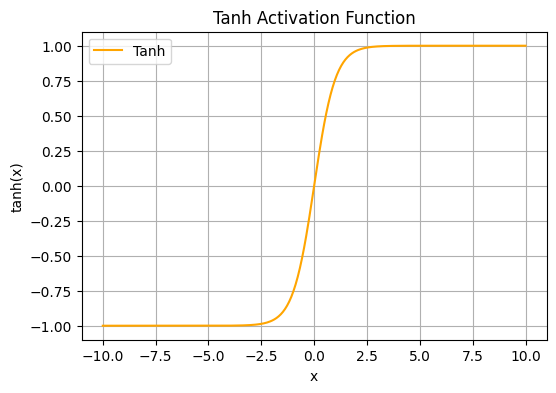

In [31]:
y = tf.math.tanh(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Tanh', color='orange')
plt.title('Tanh Activation Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()
plt.show()


In [37]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Tanh activation
output = tf.math.tanh(x)

# Print the result
print(output.numpy())


[0.46211717]


3. ReLU (Rectified Linear Unit)

Formula:

ReLU(x)=max(0,x)

Range: [0, ∞)

Properties:

-Computationally efficient.

-Reduces vanishing gradient problem.

-Can cause "dying ReLU" (neurons stuck at 0).

Use Cases:

-Most hidden layers in modern deep networks (CNNs, MLPs).

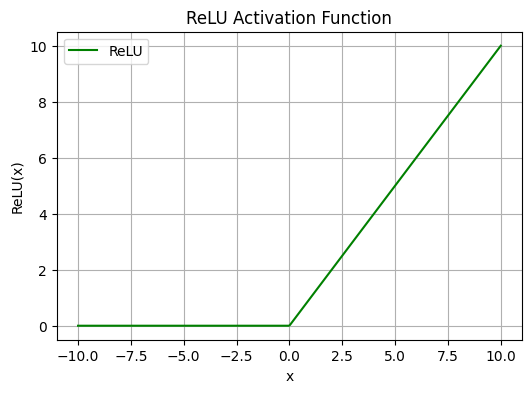

In [32]:
y = tf.nn.relu(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='ReLU', color='green')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()
plt.show()


In [38]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([-1.0, 0.0, 2.0], dtype=tf.float32)

# Apply ReLU activation
output = tf.nn.relu(x)

# Print the result
print(output.numpy())


[0. 0. 2.]


4. Leaky ReLU

Formula:

LeakyReLU(𝑥)={𝑥 𝑥>0 
              𝛼𝑥 𝑥≤0}​ 


Range: (-∞, ∞)

Properties:

-Solves "dying ReLU" problem.
-Small gradient for negative inputs.

Use Cases:

-Hidden layers in deep networks where standard ReLU fails.

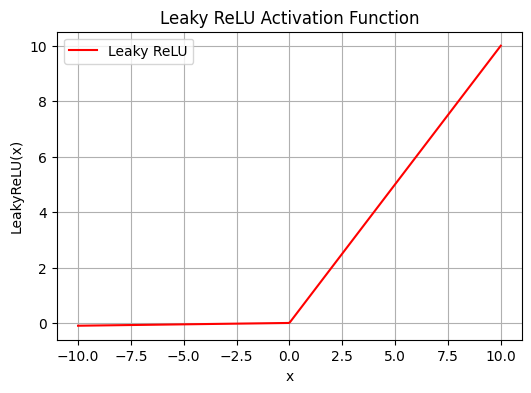

In [33]:
y = tf.nn.leaky_relu(x, alpha=0.01)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('LeakyReLU(x)')
plt.grid(True)
plt.legend()
plt.show()


In [39]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([-1.0, 0.0, 2.0], dtype=tf.float32)

# Apply Leaky ReLU activation
output = tf.nn.leaky_relu(x, alpha=0.01)

# Print the result
print(output.numpy())


[-0.01  0.    2.  ]


5. Softmax

Formula (vector x of length n):
softmax(x_i) = exp(x_i) / sum(exp(x_j) for j in range(n))

Range: (0, 1), sum = 1
Properties:

Converts logits to probabilities

Differentiable

Use Cases:

Multi-class classification (output layer)

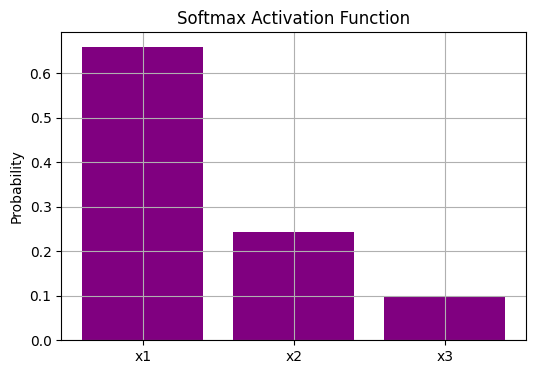

In [34]:
x_vec = np.array([2.0, 1.0, 0.1], dtype=np.float32)
y_vec = tf.nn.softmax(x_vec)

plt.figure(figsize=(6,4))
plt.bar(['x1','x2','x3'], y_vec.numpy(), color='purple')
plt.title('Softmax Activation Function')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [40]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([2.0, 1.0, 0.1], dtype=tf.float32)

# Apply Softmax activation
output = tf.nn.softmax(x, axis=0)

# Print the result
print(output.numpy())


[0.6590012  0.24243298 0.09856589]


6. Swish

Formula:
Swish(x) = x * σ(x)

Properties:

Smooth, non-monotonic

Can perform better than ReLU in deep networks

Use Cases:

Modern deep networks, especially for vision tasks

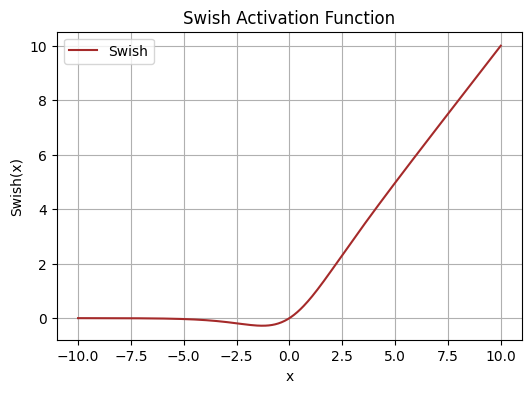

In [35]:
y = x * tf.sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Swish', color='brown')
plt.title('Swish Activation Function')
plt.xlabel('x')
plt.ylabel('Swish(x)')
plt.grid(True)
plt.legend()
plt.show()


In [41]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Swish activation
swish = x * tf.sigmoid(x)

# Print the result
print(swish.numpy())


[0.31122968]


| Activation | Range   | Pros                          | Cons                      | Typical Use                |
| ---------- | ------- | ----------------------------- | ------------------------- | -------------------------- |
| Sigmoid    | (0, 1)  | Probabilistic, smooth         | Vanishing gradient        | Output layer (binary)      |
| Tanh       | (-1, 1) | Zero-centered                 | Vanishing gradient        | Hidden layers, RNNs        |
| ReLU       | [0, ∞)  | Efficient, sparse             | Dying ReLU                | Hidden layers              |
| Leaky ReLU | (-∞, ∞) | Fixes dying ReLU              | Slightly more computation | Hidden layers              |
| Softmax    | (0, 1)  | Probabilities, differentiable | Not zero-centered         | Output layer (multi-class) |
| Swish      | (-∞, ∞) | Smooth, better for deep nets  | More computation          | Modern deep networks       |
